In [132]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [133]:
# on google sheets go to File>Share>Publish to Web>As CSV - and use that link

data_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSSFkyiphfNhBCMi84feI8v4SbeJkJub5vAN_jVgwUbjPLlPJ8UskzbWCtPOsqNmHgrv2CgnwbTr7ic/pub?output=csv'


In [134]:
df = pd.read_csv(data_url, parse_dates=['reporting_day'], infer_datetime_format=True)
df.head()

,ad_id,reporting_day,campaign_id,fb_campaign_id,age,gender,education,state,marital,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,2017-08-15,936,103916,30-34,M,high.school,CA,married,7350,1,1.43,2,1
1,708749,2017-08-15,936,103917,30-34,M,professional.course,AZ,married,17861,2,1.82,2,0
2,708771,2017-08-15,936,103920,30-34,M,university.degree,UT,married,693,0,0.00,1,0
3,708815,2017-08-15,936,103928,30-34,M,high.school,NH,single,4259,1,1.25,1,0
4,708818,2017-08-15,936,103928,30-34,M,professional.course,AZ,single,4133,1,1.29,1,1


In [135]:
df.info()
print(f'duplicates {df.duplicated().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ad_id                761 non-null    int64         
 1   reporting_day        761 non-null    datetime64[ns]
 2   campaign_id          761 non-null    int64         
 3   fb_campaign_id       761 non-null    int64         
 4   age                  761 non-null    object        
 5   gender               761 non-null    object        
 6   education            761 non-null    object        
 7   state                746 non-null    object        
 8   marital              761 non-null    object        
 9   impressions          761 non-null    int64         
 10  clicks               761 non-null    int64         
 11  spent                761 non-null    float64       
 12  total_conversion     761 non-null    int64         
 13  approved_conversion  761 non-null  

In [136]:
# No missing values besides on State, before deciding how to handle the missing values I'll check for the relevance of this feature
# No duplicates

# some of the columns are just ID's the only important ID will be campaign ID, so the others can be dropped
# also campaign ID is not a interger, so I'll cast as object

In [137]:
state = pd.DataFrame((df.groupby('state', as_index=False)['approved_conversion'].sum()))
state2 = pd.DataFrame(data=(df['state'].value_counts().sort_index()))


In [138]:
state2.reset_index(inplace=True)
state2.rename(columns={"state":"total", 'index':'state'}, inplace=True)


In [139]:
state_comp = state.merge(state2,on='state')
state_comp.head(10) #total of ads vs total of conversions - I will plot this below

,state,approved_conversion,total
0,AB,2,4
1,AL,1,2
2,AR,3,4
3,AZ,12,15
4,BC,4,4
5,CA,162,198
6,CO,47,48
7,CT,6,17
8,DC,0,1
9,DE,6,10


In [140]:
df = df.drop(columns=['ad_id', 'fb_campaign_id'])

In [141]:
df['campaign_id']=df['campaign_id'].astype('object')

### EDA

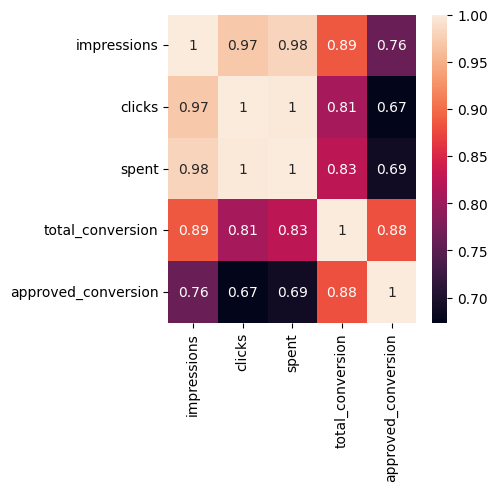

In [142]:
# correlation among numerical features:

corr = df.corr()
fig, axes = plt.subplots(figsize=(4,4))
sns.heatmap(corr, annot=True);


''

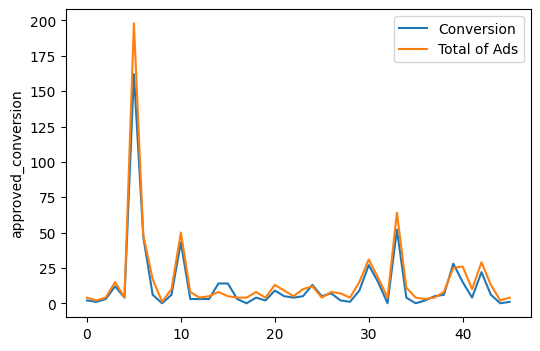

In [146]:
# I suspect that 'state' is not relevant, we will mostly have more conversions on the states where we had more ads, 
# the graph below will show how close the ammount of ads directed to one area is proportional to the ammount of conversions

fig, axes = plt.subplots(figsize=(6,4))
sns.lineplot(data = state_comp['approved_conversion'],label='Conversion' )
sns.lineplot(data = state_comp['total'], label='Total of Ads');